#2º Projeto Prático - Dados - Desenvolve Boticário

##Modelagem de Banco de Dados Relacional

Grazielle dos Santos Henrique

Desafio: <br>
 <br>
Realize uma análise completa usando Python e a biblioteca Pandas numa base de
dados de preços de aluguéis em São Paulo. Utilize a regressão linear para modelar uma relação entre variáveis do conjunto de dados. Os estudantes aprenderão a importar dados, limpar, explorar, visualizar e tirar conclusões a partir dos dados, além de ajustar um modelo de regressão linear e avaliar seu desempenho.
 <br> <br>
 Etapas:
  <br> <br>
a. Obter base de dados: Faça download da base de dados;<br>
b. Importação e Limpeza: Importe os dados para um DataFrame do Pandas, limpe os
dados e trate valores ausentes;<br>
c. Análise Descritiva: Realize uma análise descritiva dos dados, calculando estatísticas básicas e identificando tendências;<br>
d. Modelagem de Regressão Linear: Ajuste um modelo de regressão linear aos dados
para tentar prever o preço do aluguel em uma determinada área;<br>
e. Visualização de Dados: Crie visualizações gráficas usando bibliotecas como
Matplotlib ou Seaborn para representar os dados;<br>
f. Conclusões: Tire conclusões a partir das análises realizadas e apresente os resultados em um relatório.

---


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
from scipy.stats import pearsonr, linregress
from scipy.stats import ttest_ind

from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.express as px

> a. Obter base de dados

In [137]:
id = '1DcS1VgGGVa5O6JHuD7ZeKmxgI1ejCw4m'
url = f'https://drive.google.com/uc?id={id}&export=download'

> b. Importação e Limpeza

In [138]:
df = pd.read_csv(url)
df

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


As colunas incluem endereço, bairro, área, quartos, garagem, tipo de imóvel, aluguel e total, e foram traduzidas para português.

In [139]:
df.rename(columns={
    'address': 'Endereco',
    'district': 'Bairro',
    'area': 'Area',
    'bedrooms': 'Quartos',
    'garage': 'Garagem',
    'type': 'Tipo',
    'rent': 'Aluguel',
    'total': 'Total'
}, inplace=True)

In [140]:
df.shape

(11657, 8)

Foi feita a verificação dos valores ausentes, porém não foram encontrados valores nulos.

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Endereco  11657 non-null  object
 1   Bairro    11657 non-null  object
 2   Area      11657 non-null  int64 
 3   Quartos   11657 non-null  int64 
 4   Garagem   11657 non-null  int64 
 5   Tipo      11657 non-null  object
 6   Aluguel   11657 non-null  int64 
 7   Total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [142]:
print(df.isna().sum())

Endereco    0
Bairro      0
Area        0
Quartos     0
Garagem     0
Tipo        0
Aluguel     0
Total       0
dtype: int64


In [143]:
df.describe()

,Area,Quartos,Garagem,Aluguel,Total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


Após verificar os dados iniciais do dataframe, foi identificado que o menor apartamento tem 10m². Então decidi substituir todos os valores constantes na variável 'área', menor que 10m² por 10m².

In [144]:
area = (df['Area'] < 10).sum()
area

7

In [145]:
df.loc[df['Area'] < 10, 'Area'] = 10
df

,Endereco,Bairro,Area,Quartos,Garagem,Tipo,Aluguel,Total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


> c. Análise Descritiva

In [146]:
df.describe()

,Area,Quartos,Garagem,Aluguel,Total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.660547,1.966286,1.060393,3250.814789,4080.030625
std,74.015322,0.931313,1.132349,2650.711557,3352.480274
min,10.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


Em seguida os resultados das estatísticas descritivas das variáveis categóricas e numéricas.

In [147]:
print(df['Bairro'].value_counts())

Bairro
Bela Vista               352
Vila Mariana             232
Jardim Paulista          220
Centro                   178
Pinheiros                159
                        ... 
Jardim do Carmo            1
Santa Inês                 1
Jardim Santa Efigenia      1
Vila Maricy                1
Retiro Morumbi             1
Name: count, Length: 1199, dtype: int64


In [148]:
print(df.groupby('Bairro')['Aluguel'].describe().round(2))

                                                    count      mean      std  \
Bairro                                                                         
Aclimação                                            50.0   2810.26  1750.91   
Adalgisa                                              4.0   7275.50  1663.18   
Agua Branca                                           1.0   2435.00      NaN   
Alphaville                                           24.0  11247.46  3957.89   
Alphaville Centro Industrial E Empresarial/alph...    5.0   6300.00  4538.17   
...                                                   ...       ...      ...   
Várzea da Barra Funda                                11.0   3608.91  1689.82   
Água Branca                                          44.0   3774.05  2485.37   
Água Fria                                            20.0   3721.80  3017.01   
Água Funda                                            1.0   3000.00      NaN   
Água Rasa                               

In [149]:
print(df['Tipo'].value_counts())

Tipo
Apartamento           7194
Casa                  2841
Studio e kitnet       1381
Casa em condomínio     241
Name: count, dtype: int64


In [150]:
descritiva_tipo_imovel = df.groupby('Tipo')['Total'].describe()
print(descritiva_tipo_imovel)

                     count         mean          std    min     25%     50%  \
Tipo                                                                          
Apartamento         7194.0  4435.428413  3496.018200  686.0  2266.0  3293.0   
Casa                2841.0  3824.244280  3259.062002  509.0  1493.0  2843.0   
Casa em condomínio   241.0  4576.232365  4733.798269  556.0  1572.0  2712.0   
Studio e kitnet     1381.0  2668.280232  1624.083428  588.0  1512.0  2318.0   

                        75%      max  
Tipo                                  
Apartamento         5158.75  28700.0  
Casa                4816.00  21050.0  
Casa em condomínio  4851.00  21140.0  
Studio e kitnet     3458.00  26710.0  


In [151]:
print(df['Tipo'].value_counts())

Tipo
Apartamento           7194
Casa                  2841
Studio e kitnet       1381
Casa em condomínio     241
Name: count, dtype: int64


Tipos de imóveis em porcentagem.

In [152]:
df['Tipo'].value_counts(normalize=True) * 100

Tipo
Apartamento           61.713992
Casa                  24.371622
Studio e kitnet       11.846959
Casa em condomínio     2.067427
Name: proportion, dtype: float64

Agrupando dados pelo aluguel e calculando a média da área.

In [153]:
aluguel_media_area = df.groupby('Aluguel')['Area'].mean()

print(aluguel_media_area)

Aluguel
500       37.857143
504       30.000000
550       31.200000
552       25.000000
566       20.000000
            ...    
14500    224.000000
14530    251.200000
14900    450.000000
15000    276.424779
25000     24.000000
Name: Area, Length: 1662, dtype: float64


Calculando a diferença entre as colunas 'aluguel' e 'total' para descobrir o valor das taxas como Condominio, IPTU, etc.



In [154]:
df['Taxas'] = df['Total'] - df['Aluguel']

print(df)

                              Endereco                   Bairro  Area  \
0                           Rua Herval               Belenzinho    21   
1                   Avenida São Miguel             Vila Marieta    15   
2                     Rua Oscar Freire                Pinheiros    18   
3                     Rua Júlio Sayago                  Vila Ré    56   
4                   Rua Barata Ribeiro               Bela Vista    19   
...                                ...                      ...   ...   
11652          Avenida Adolfo Pinheiro              Santo Amaro    94   
11653  Rua Professor Alexandre Correia     Jardim Vitória Régia   350   
11654                 Rua Abílio Borin         Jardim Caravelas    84   
11655                Rua Forte William  Jardim Fonte do Morumbi    76   
11656              Rua Alexandre Dumas              Santo Amaro   110   

       Quartos  Garagem                Tipo  Aluguel  Total  Taxas  
0            1        0     Studio e kitnet     2400  

Covariancia de relação entre as variáveis 'Area', 'Quartos', 'Aluguel', 'Total' e 'Taxas'.

In [155]:
df[['Area', 'Quartos', 'Aluguel', 'Total', 'Taxas']].cov(  ).round(2)

,Area,Quartos,Aluguel,Total,Taxas
Area,5478.27,50.18,130903.15,161825.85,30922.70
Quartos,50.18,0.87,1311.25,1642.20,330.94
Aluguel,130903.15,1311.25,7026271.76,8691919.27,1665647.51
Total,161825.85,1642.20,8691919.27,11239123.99,2547204.71
Taxas,30922.70,330.94,1665647.51,2547204.71,881557.20


Covariancia de relação  entre as variáveis 'Area' e 'Aluguel'.

In [156]:
df[['Area', 'Aluguel']].cov(  ).round(2)

,Area,Aluguel
Area,5478.27,130903.15
Aluguel,130903.15,7026271.76


Foi aplicado o método dummies `get_dummies()` na variável 'Tipo' para transformar diretamente em colunas binárias.

In [157]:
dfDummies = pd.get_dummies(df['Tipo'])

dfDummies = dfDummies.astype(int)

dfDummies.head()

,Apartamento,Casa,Casa em condomínio,Studio e kitnet
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,0,1,0
4,0,0,0,1


Adicionando as novas colunas ao dataframe principal.

In [158]:
df = pd.concat([df, dfDummies], axis=1)

print(df.head())

             Endereco        Bairro  Area  Quartos  Garagem  \
0          Rua Herval    Belenzinho    21        1        0   
1  Avenida São Miguel  Vila Marieta    15        1        1   
2    Rua Oscar Freire     Pinheiros    18        1        0   
3    Rua Júlio Sayago       Vila Ré    56        2        2   
4  Rua Barata Ribeiro    Bela Vista    19        1        0   

                 Tipo  Aluguel  Total  Taxas  Apartamento  Casa  \
0     Studio e kitnet     2400   2939    539            0     0   
1     Studio e kitnet     1030   1345    315            0     0   
2         Apartamento     4000   4661    661            1     0   
3  Casa em condomínio     1750   1954    204            0     0   
4     Studio e kitnet     4000   4654    654            0     0   

   Casa em condomínio  Studio e kitnet  
0                   0                1  
1                   0                1  
2                   0                0  
3                   1                0  
4            

> d. Modelagem de regressão Linear

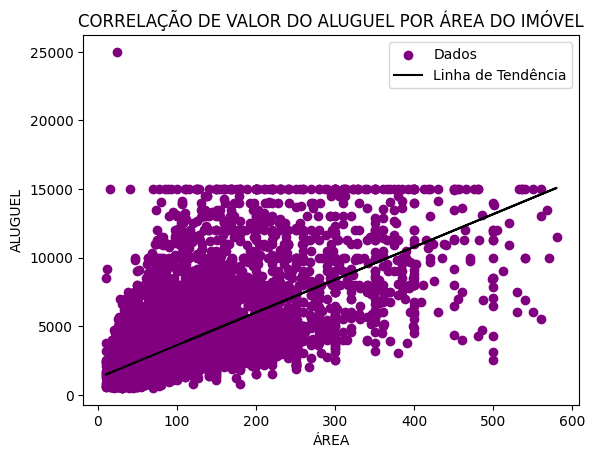

Resultado do coeficiente de correlação: 0.6672152770768244
Valor p: 0.0


In [159]:
X,y = df['Area'], df['Aluguel']

plt.scatter(X, y, color='purple', label='Dados')

slope, intercept, _, _, _ = linregress(X, y)
trendline = intercept + slope * X

plt.plot(X, trendline, color='black', label='Linha de Tendência')

plt.xlabel('ÁREA')
plt.ylabel('ALUGUEL')
plt.title('CORRELAÇÃO DE VALOR DO ALUGUEL POR ÁREA DO IMÓVEL')
plt.legend()
plt.show()

r, p_value = pearsonr(X, y)
print(f'Resultado do coeficiente de correlação: {r}')
print(f'Valor p: {p_value}')


A correlação {r} mostra o quanto o nosso modelo conseguiu explicar os dados.<br>
O seu valor varia entre 0 (o modelo não consegue explicar a relação entre as variáveis) até 100% (o modelo conseguiu explicar o relacionamento entre as variáveis). <br>
Neste caso, tem-se `66%.`

Coeficiente de determinação com variável dependente 'Aluguel' e variável independentes 'Area'.

In [160]:
X = df[['Area']]
y = df['Aluguel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

print('O coeficiente de determinacao R² é de: {:.2f}'.format(modelo.score(X_test, y_test)))

O coeficiente de determinacao R² é de: 0.44


O coeficiente de determinação R² varia de 0 a 1.<br>
Um valor de 0 significa que o modelo não explica nenhuma variabilidade nos dados. <br>
Um valor de 1 significa que o modelo explica toda a variabilidade nos dados. <br>
No caso, o valor de R² é 0.44. Isso significa que aproximadamente `44%` da variabilidade no aluguel pode ser explicada pela área. <br>
Em outras palavras, o modelo de regressão linear simples está capturando parte da relação entre a área e o aluguel.

Previsão do valor de aluguel.

In [161]:
entrada = X_test.iloc[0]
entrada

Area    60
Name: 3858, dtype: int64

In [162]:
entrada = X_test.iloc[0]

entrada = np.array(entrada).reshape(-1, 1)
previsao = modelo.predict(entrada)[0]
print(f'Previsão do valor do aluguel: {previsao:.2f}')

Previsão do valor do aluguel: 2657.03


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Foi usado como base para previsão do aluguel um imovel com area de 60m², e o resultado foi de R$ 2.657.03

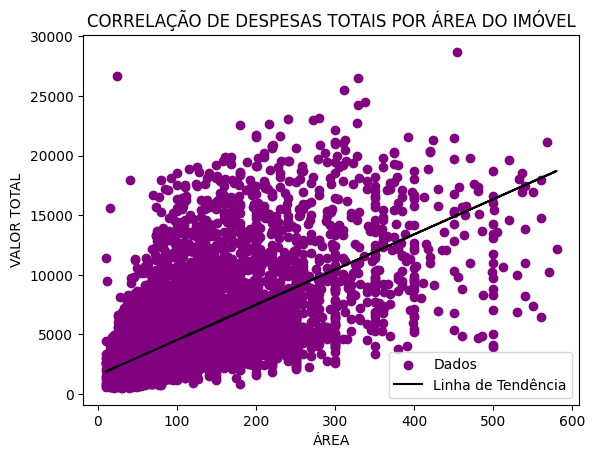

Resultado do coeficiente de correlação: 0.6521688288604257
Valor p: 0.0


In [163]:
X,y = df['Area'], df['Total']

plt.scatter(X, y, color='purple', label='Dados')

slope, intercept, _, _, _ = linregress(X, y)
trendline = intercept + slope * X

plt.plot(X, trendline, color='black', label='Linha de Tendência')

plt.xlabel('ÁREA')
plt.ylabel('VALOR TOTAL')
plt.title('CORRELAÇÃO DE DESPESAS TOTAIS POR ÁREA DO IMÓVEL')
plt.legend()
plt.show()

r, p_value = pearsonr(X, y)
print(f'Resultado do coeficiente de correlação: {r}')
print(f'Valor p: {p_value}')

In [164]:
X = df[['Area']]
y = df['Quartos']
z = df['Total']

X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train, z_train)

print('O coeficiente de determinacao R² é de: {:.2f}'.format(modelo.score(X_test, y_test, z_test)))

O coeficiente de determinacao R² é de: 0.56


In [165]:
X = df[['Area']]
y = df['Aluguel']
z = df['Total']

X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train, z_train)

print('O coeficiente de determinacao R² é de: {:.2f}'.format(modelo.score(X_test, y_test, z_test)))

O coeficiente de determinacao R² é de: 0.41


Muito similar ao caso anterior, o valor de R² é 0.41. Isso significa que aproximadamente `41%` da variabilidade no valor total pode ser explicada pela área.

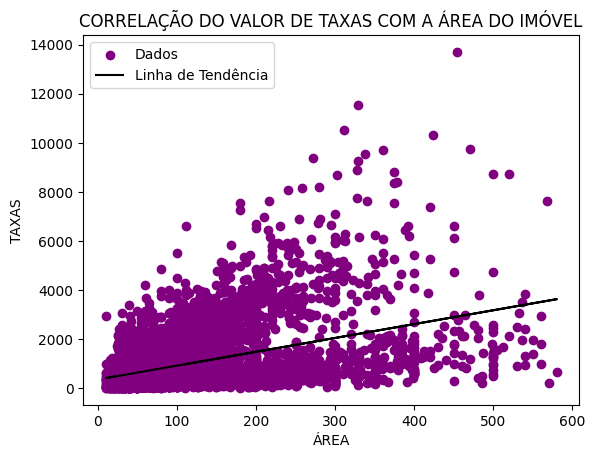

Resultado do coeficiente de correlação: 0.44496986222285545
Valor p: 0.0


In [166]:
X,y = df['Area'], df['Taxas']

plt.scatter(X, y, color='purple', label='Dados')

slope, intercept, _, _, _ = linregress(X, y)
trendline = intercept + slope * X

plt.plot(X, trendline, color='black', label='Linha de Tendência')

plt.xlabel('ÁREA')
plt.ylabel('TAXAS')
plt.title('CORRELAÇÃO DO VALOR DE TAXAS COM A ÁREA DO IMÓVEL')
plt.legend()
plt.show()

r, p_value = pearsonr(X, y)
print(f'Resultado do coeficiente de correlação: {r}')
print(f'Valor p: {p_value}')

Graficos de dispersão para verificar a regressão linear entre as variáveis.

In [167]:
pairs = [
    ('Area', 'Aluguel'),
    ('Total', 'Aluguel'),
    ('Taxas', 'Aluguel'),
    ('Area', 'Total'),
    ('Aluguel', 'Total'),
    ('Taxas', 'Total')
]

scatter_color = 'purple'
line_color = 'black'

def add_trendline(fig, x, y):
    X = sm.add_constant(df[x])
    model = sm.OLS(df[y], X).fit()
    df['trendline'] = model.predict(X)

    fig.add_trace(
        go.Scatter(
            x=df[x], y=df['trendline'],
            mode='lines', line=dict(color=line_color),
            name='Linha de Tendência'
        )
    )

for x, y in pairs:
    fig = px.scatter(df, x=x, y=y, title=f'Regressão Linear entre {x} e {y}', color_discrete_sequence=[scatter_color])
    add_trendline(fig, x, y)
    fig.update_layout(
        width=1200,
        height=500,
        xaxis_title=x,
        yaxis_title=y
    )
    fig.show()

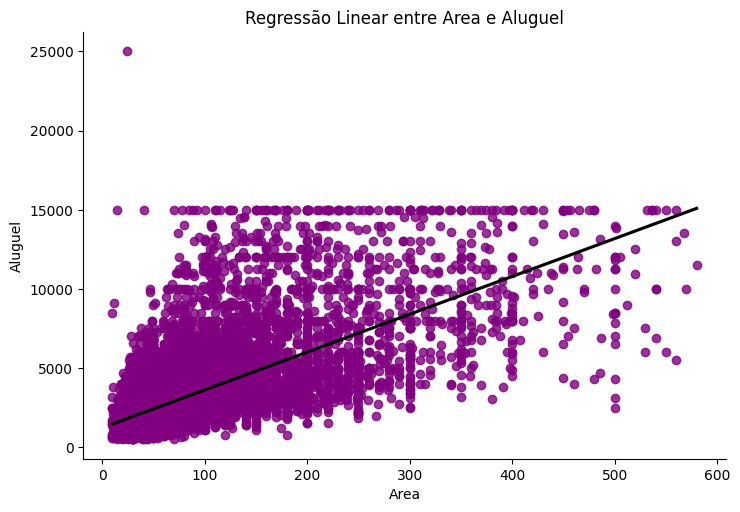

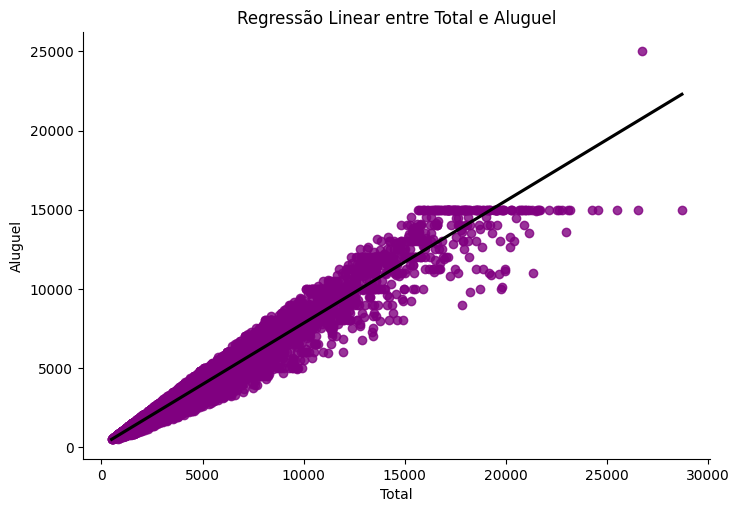

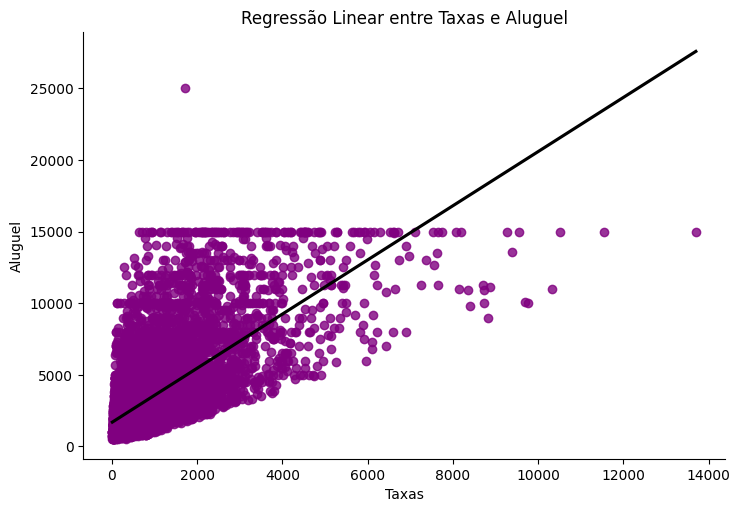

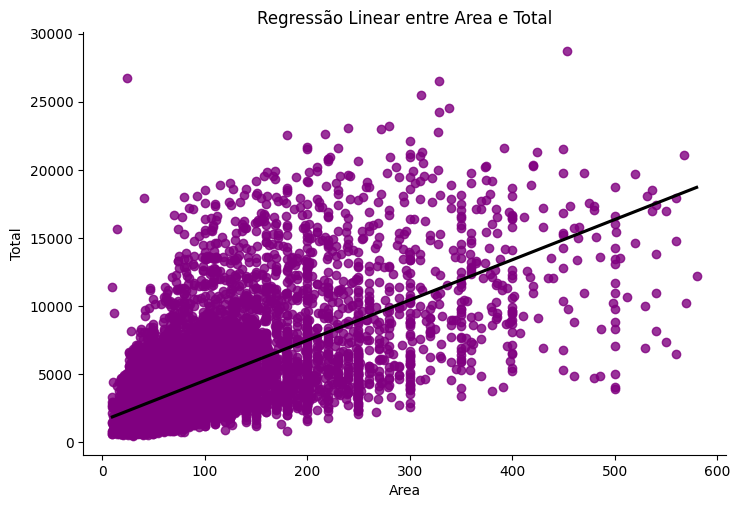

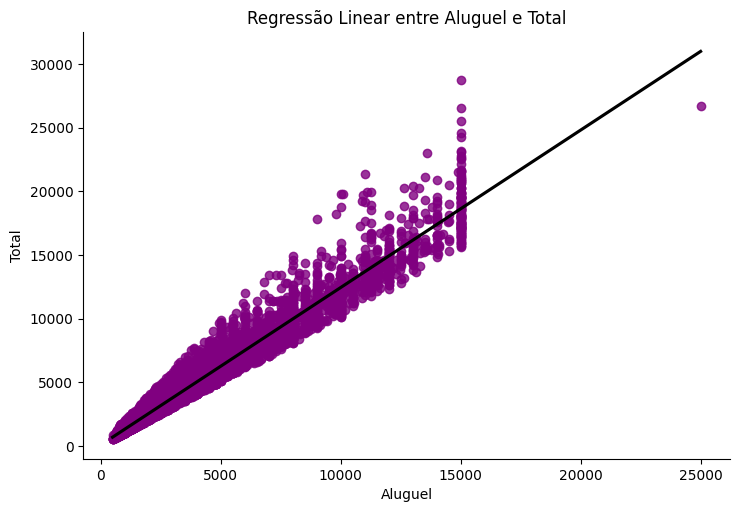

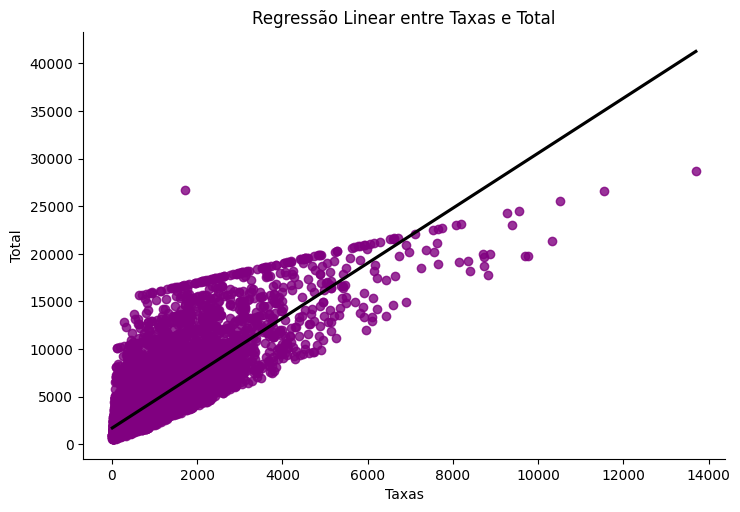

In [168]:
pairs = [
    ('Area', 'Aluguel'),
    ('Total', 'Aluguel'),
    ('Taxas', 'Aluguel'),
    ('Area', 'Total'),
    ('Aluguel', 'Total'),
    ('Taxas', 'Total')
]

scatter_color = 'purple'
line_color = 'black'

for x, y in pairs:
    sns.lmplot(
        x=x, y=y, data=df, aspect=1.5, ci=None,
        scatter_kws={'color': scatter_color},
        line_kws={'color': line_color}
    )
    plt.title(f'Regressão Linear entre {x} e {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

> e. Visualização de Dados

Visualizações gráficas usando bibliotecas como Matplotlib e Seaborn para representar os dados.
<br>
Para as análises gráficas, foi feita a organização dos dados de acordo com o tipo de imóvel e a quantidade. Sendo esta, primordial para o melhor entendimento do estudo.

Gráfico de distribuição dos tipos de imóveis.

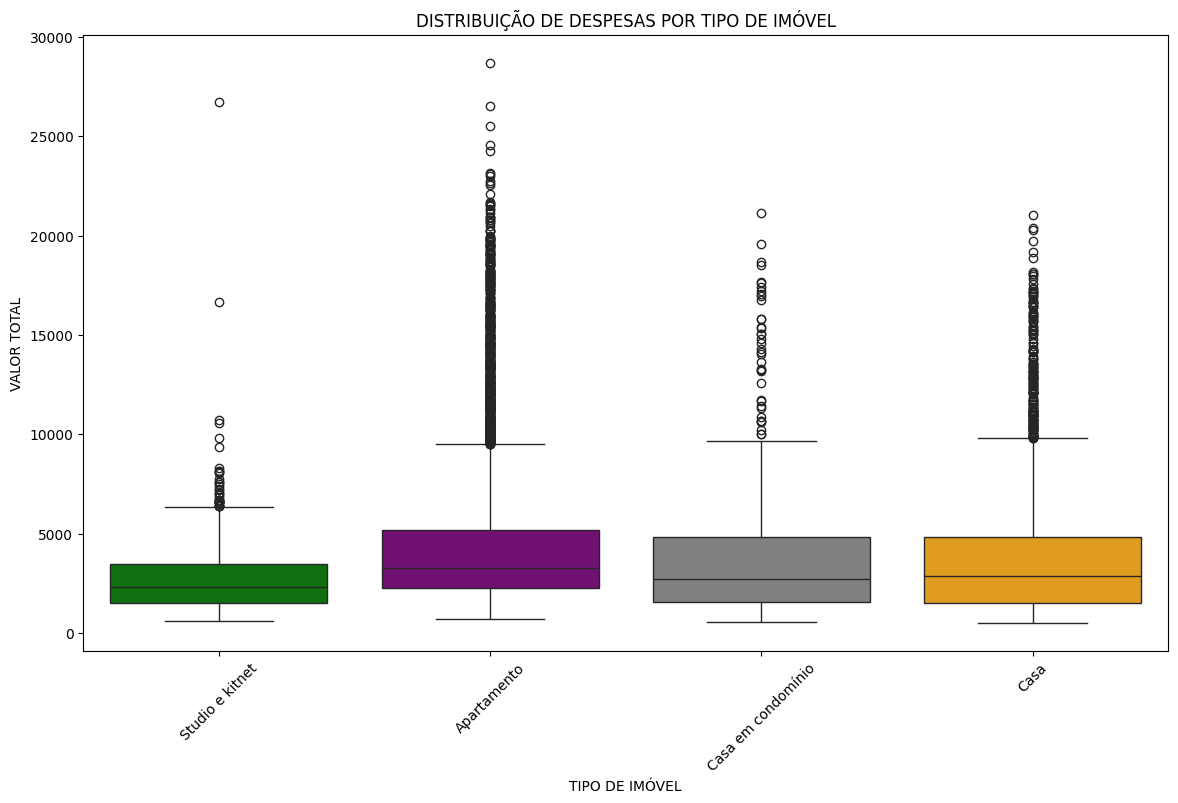

In [169]:
X = df['Tipo']
y = df['Total']
palette = ['green', 'purple', 'gray', 'orange']

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Tipo', y='Total', palette=palette, hue='Tipo', legend=False)
plt.title('DISTRIBUIÇÃO DE DESPESAS POR TIPO DE IMÓVEL')
plt.xlabel('TIPO DE IMÓVEL')
plt.ylabel('VALOR TOTAL')
plt.xticks(rotation=45)
plt.show()


A partir do gráfico acima, foi possível observar que a maior quantidade está concentrada em imóveis do tipo apartamento.

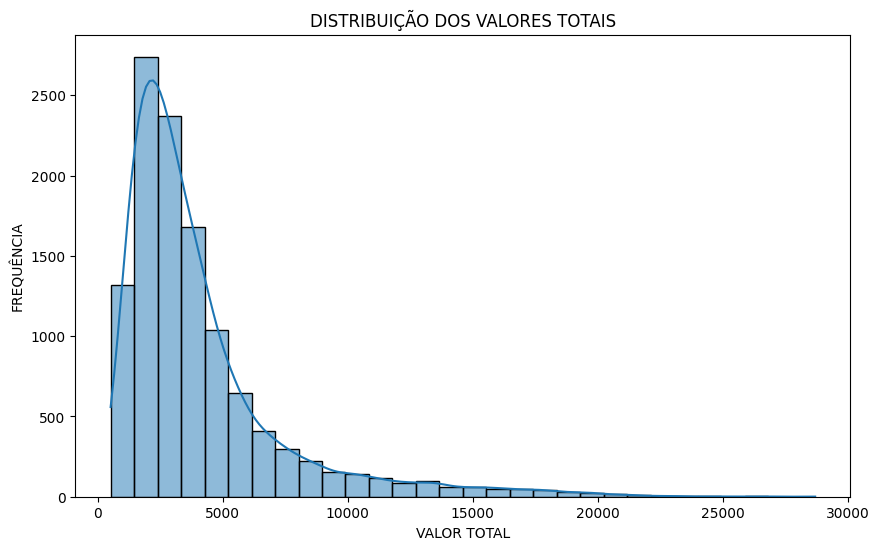

In [170]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], bins=30, kde=True)
plt.title('DISTRIBUIÇÃO DOS VALORES TOTAIS')
plt.xlabel('VALOR TOTAL')
plt.ylabel('FREQUÊNCIA')
plt.show()

Para obteção dos resultados em termos de porcentagem foi feita a conversão dos dados e a sua exibição em gráfico de pizza, com a legenda em exibição à direita. Também foi trazida uma segunda demonstração, sendo esta com a descrição dos tipos de imóvel na própria área do gráfico.

Grafico de Pizza com os Dados obtidos acima.

In [171]:
labels = ['APARTAMENTO', 'CASA', 'STUDIO E KITNET', 'CASA EM CONDOMINIO']
values = [61.71, 24.37, 11.84, 2.06]
colors = ['purple','orange', 'green', 'gray']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker_colors=colors)])
fig.update_traces(textinfo='percent')
fig.update_layout(title='DISTRIBUICAO PERCENTUAL DE TIPO DE IMÓVEL')

fig.show()

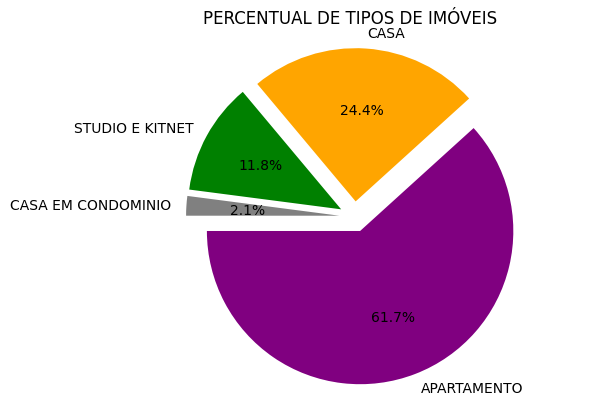

In [172]:
labels = ['APARTAMENTO', 'CASA', 'STUDIO E KITNET', 'CASA EM CONDOMINIO']
values = [61.71, 24.37, 11.84, 2.06]
colors = ['purple','orange', 'green', 'gray']

fig, ax = plt.subplots()
explode = (0.1, 0.1, 0.1, 0.1)
ax.pie(values, labels=labels, autopct='%1.1f%%', explode=explode, startangle=180, colors=colors)
ax.axis('equal')
ax.set_title('PERCENTUAL DE TIPOS DE IMÓVEIS')

plt.show()

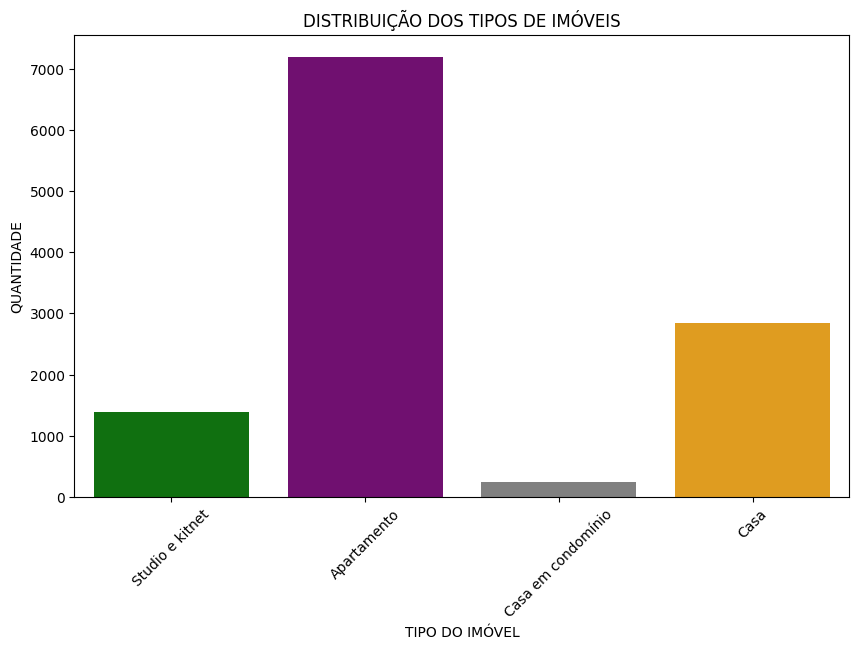

In [173]:
# Mapeando as cores aos tipos de imóvel na mesma ordem
unique_types = df['Tipo'].unique()
palette = ['green', 'purple', 'gray', 'orange']

# Crie o gráfico com a paleta de cores personalizada
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tipo', palette=palette, hue='Tipo', legend=False)
plt.title('DISTRIBUIÇÃO DOS TIPOS DE IMÓVEIS')
plt.xlabel('TIPO DO IMÓVEL')
plt.ylabel('QUANTIDADE')
plt.xticks(rotation=45)
plt.show()


Abaixo tem-se o histograma do valor de utilidades por quantidade de imóveis.

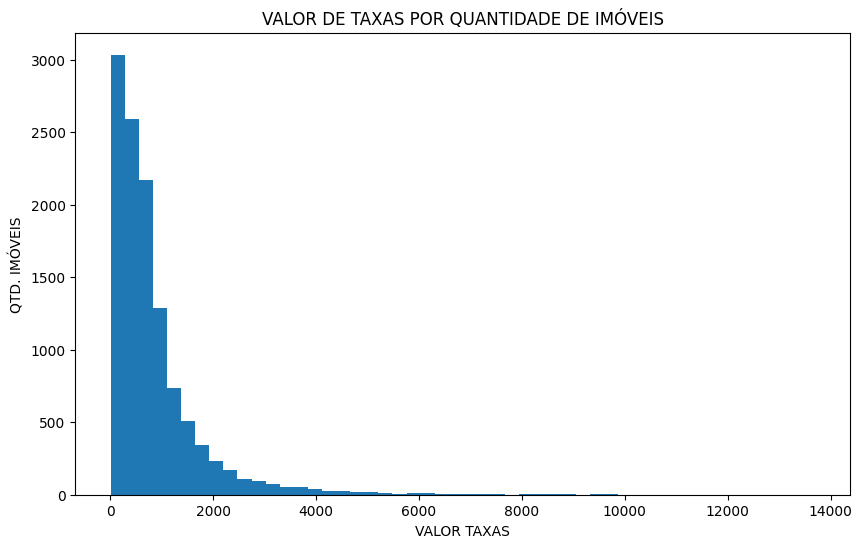

In [174]:
plt.figure(figsize=(10, 6))
plt.hist(df['Taxas'], bins=50)
plt.title('VALOR DE TAXAS POR QUANTIDADE DE IMÓVEIS')
plt.xlabel('VALOR TAXAS')
plt.ylabel('QTD. IMÓVEIS')
plt.show()

Grafico de barras para análise de qtd. de quartos disponíveis por qtd. de imóveis.

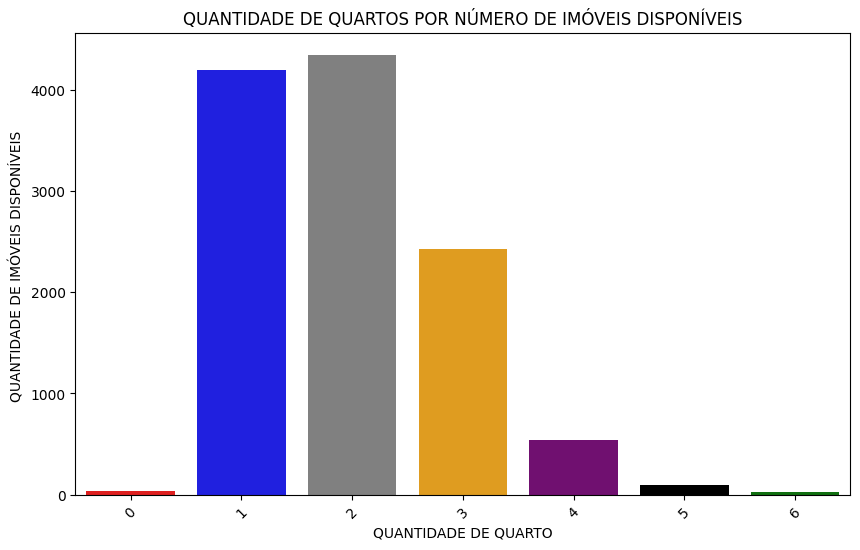

In [175]:
unique_types = df['Quartos'].unique()
palette = ['red', 'blue', 'gray', 'orange', 'purple', 'black', 'green']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Quartos', palette=palette, hue='Quartos', legend=False)
plt.title('QUANTIDADE DE QUARTOS POR NÚMERO DE IMÓVEIS DISPONÍVEIS')
plt.xlabel('QUANTIDADE DE QUARTO')
plt.ylabel('QUANTIDADE DE IMÓVEIS DISPONÍVEIS ')
plt.xticks(rotation=45)
plt.show()

Em resumo, os valores positivos obtidos abaixo, indicam que as variáveis analisadas tendem a aumentar juntas. Ou seja, existe uma covariancia possitiva entre as variáveis analisadas.



Graficos de dispersão entre as variáveis.

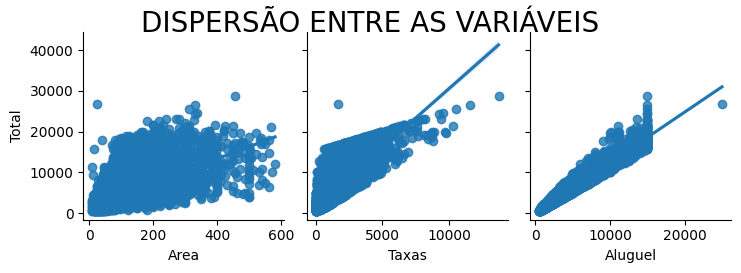

In [176]:
ax = sns.pairplot(df, y_vars='Total', x_vars=['Area', 'Taxas', 'Aluguel'], kind='reg')
ax.fig.suptitle('DISPERSÃO ENTRE AS VARIÁVEIS', fontsize=20, y=1.05)
plt.show()


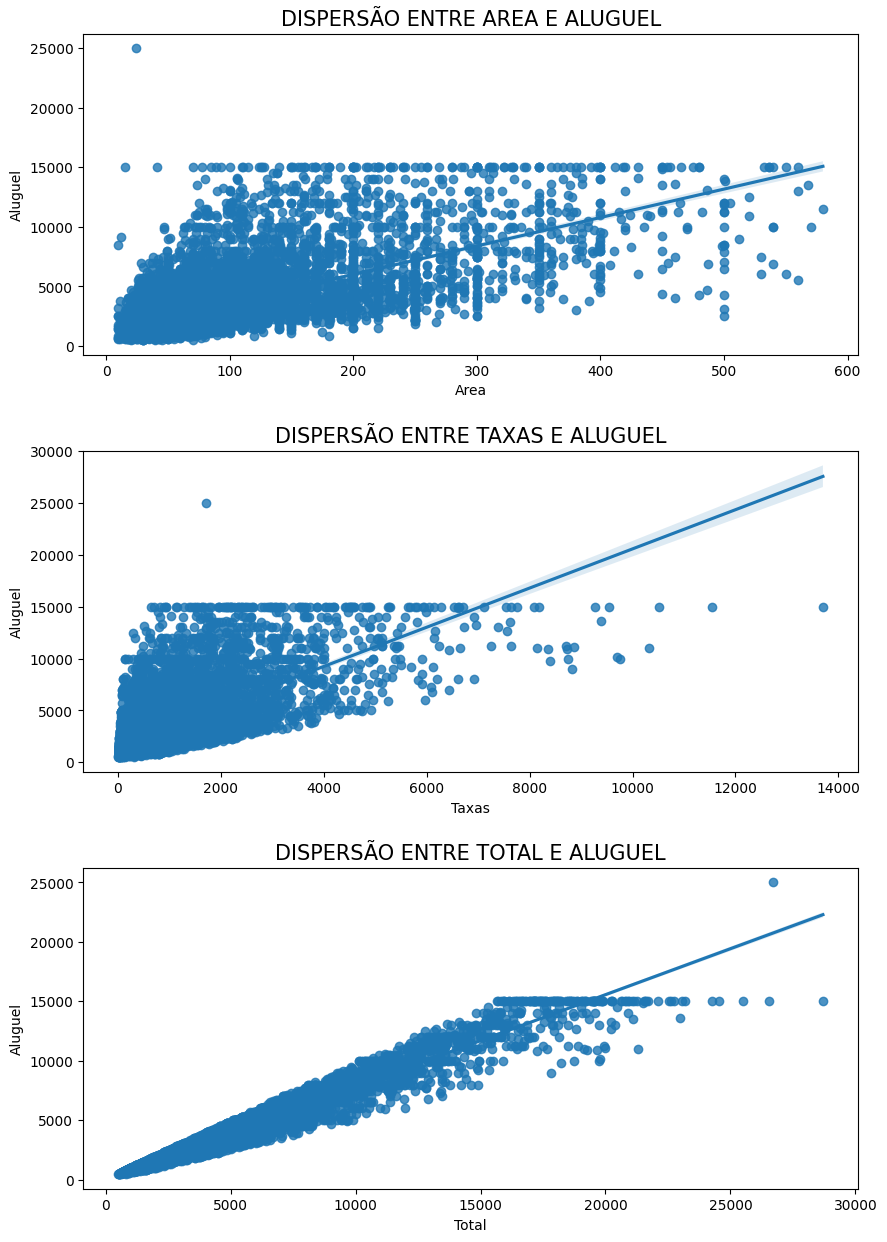

In [177]:
x_vars = ['Area', 'Taxas', 'Total']
y_var = 'Aluguel'

fig, axes = plt.subplots(nrows=len(x_vars), ncols=1, figsize=(10, 5 * len(x_vars)))

fig.subplots_adjust(hspace=0.3)

for i, x_var in enumerate(x_vars):
    sns.regplot(x=x_var, y=y_var, data=df, ax=axes[i])
    axes[i].set_title(f'DISPERSÃO ENTRE {x_var.upper()} E {y_var.upper()}', fontsize=15)

plt.show()

> f. Conclusões

A análise de regressão linear revelou que a variável R² é 0,44, indicando que `44%` da variabilidade no valor do aluguel pode ser explicada pela área do imóvel. Isso significa que o tamanho do imóvel influencia o valor do aluguel.
<br>
Além disso, diversas variáveis afetam os valores dos aluguéis. As mais relevantes são a quantidade de garagens, a área, o valor total do aluguel e a quantidade de quartos. As variáveis que tendem a aumentar o valor do aluguel são a área, a quantidade de quartos e a quantidade de garagens, enquanto a variável que pode reduzir o valor é o valor total do aluguel. Comparando o valor do aluguel com o valor total e a área, o R² foi 0,41, ou seja, `41%.`
<br>
O gráfico de distribuição de despesas mostra claramente que apartamentos, casas em condomínio e casas são os imóveis de maior valor.
<br>
Na previsão do aluguel,foi utilizado um imóvel com área de 60m² e obtivemos um valor de `R$ 2657.03`.
<br>
Como sugestão, seria interessante realizar uma análise segmentada por regiões. Além disso, a coluna 'Total' poderia ser melhor especificada. Seria útil adicionar o valor das despesas por região e incluir variáveis como proximidade de hospitais, shoppings, mercados, escolas, faculdades e meios de transporte.